## Exam 2

### Author: Emily Hernandez

### Special Thanks: Colton, Diego, Elias, Lizbeth

In [26]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

# This stops a few warning messages from showing
pd.options.mode.chained_assignment = None 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [27]:
file_name = 'flights'
file_location = 'https://joannabieri.com/introdatascience/data/'+file_name+'.csv'

In [38]:
# Load the data.
file_name = 'flights'
file_location1 = 'https://joannabieri.com/introdatascience/data/'+file_name+'.csv'
DF = pd.read_csv(file_location1)
DF

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400.0,5.0,15.0,2013-01-01 10:00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416.0,5.0,29.0,2013-01-01 10:00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089.0,5.0,40.0,2013-01-01 10:00:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576.0,5.0,45.0,2013-01-01 10:00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762.0,6.0,0.0,2013-01-01 11:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213.0,14.0,55.0,2013-09-30 18:00:00
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198.0,22.0,0.0,2013-10-01 02:00:00
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764.0,12.0,10.0,2013-09-30 16:00:00
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419.0,11.0,59.0,2013-09-30 15:00:00


### P. Preliminary Do an initial exploration of the flights data. Report on all the typical things: Variables, Observations, Data Types, Weirdness or NaNs…

In [30]:
#Find variables and observations

DF.shape

(336776, 19)

PRELIMINARY RESULTS:

The data frame has 33,6776 observations and 19 variables. The types of data seen in the data frame are both numerical and categorical values. The numerical values would be: year (quantitative), month (quantitative), day (quantitative), dep_time (quatitative), dep_delay (quantitative), arr_time (quantitative), arr_delay (quantitative), flight (quantitative), air time (quantitative), distance (quantitative), hour (quantitative), minute (quantitative). The categorical data shown would be: carrier (qualitative), tailnum (qualitative), origin (qualitative), destination or "dest" (qualitative), and time_hour which is also qualitative. 

There is some weirdness within this data set. We can see that in the dep_time, arr_time, air_time, dep_delay, and arr_delay there are some missing values or missing data. This could be from flights that were canceled or never departed. We can also see that there are some inconsisten data ranges, giving us negative values in the data set under dep_delay and arr_delay. This could just mean a flight left of either a flight arrived early not at the designated time. Some of this delay values could also cause our data to be skewed because of outliers. 

### 1. Question 1 (5 points)
#### What are the ten most common destinations for flights from NYC airports in 2013?

#### Make a table (Data Frame) that lists these in descending order of frequency and shows the number of flights heading to each airport.

#### Hint: You can use the airports dataset to look up the airport name based on dest code. This is the ‘faa’ code. BEWARE: If you load in a new data frame give it a new name! Our main data is in DF.

In [143]:
#Import airport data & show data frame

file_name = 'airports'
file_location2 = 'https://joannabieri.com/introdatascience/data/'+file_name+'.csv'
DF_airport = pd.read_csv(file_location2)
DF_airport

,faa,name,lat,lon,alt,tz,dst,tzone
0,04G,Lansdowne Airport,41.130472,-80.619583,1044.0,-5.0,A,America/New_York
1,06A,Moton Field Municipal Airport,32.460572,-85.680028,264.0,-6.0,A,America/Chicago
2,06C,Schaumburg Regional,41.989341,-88.101243,801.0,-6.0,A,America/Chicago
3,06N,Randall Airport,41.431912,-74.391561,523.0,-5.0,A,America/New_York
4,09J,Jekyll Island Airport,31.074472,-81.427778,11.0,-5.0,A,America/New_York
...,...,...,...,...,...,...,...,...
1453,ZUN,Black Rock,35.083228,-108.791778,6454.0,-7.0,A,America/Denver
1454,ZVE,New Haven Rail Station,41.298669,-72.925992,7.0,-5.0,A,America/New_York
1455,ZWI,Wilmington Amtrak Station,39.736667,-75.551667,0.0,-5.0,A,America/New_York
1456,ZWU,Washington Union Station,38.897460,-77.006430,76.0,-5.0,A,America/New_York


In [144]:
#Part 1 question 1 (find ten most common destinations for flights from nyc airports in 2013.

DF['dest'].value_counts().head(10)

dest
ORD    17283
ATL    17215
LAX    16174
BOS    15508
MCO    14082
CLT    14064
SFO    13331
FLL    12055
MIA    11728
DCA     9705
Name: count, dtype: int64

Question 1 Part 1:

The top ten most common destinations for flights from NYC airports in 2013 are: ORD (Chicago), ATL (Atlanta), LAX (Los Angeles), BOS (Boston), MCO (Orlando), FLL (Fort Launderdale), CLT ( Charlotte), MIA (Miami), SFO (San Francisco), DFW (Dallas-Fort Worth). 

In [145]:
#Make a table of these in descending order

destination_DF=DF['dest'].value_counts().head(10)

show (destination_DF)

Loading ITables v2.5.2 from the internet... (need help?)


### 2. Question 2 (5 points)
#### Which airlines have the most flights departing from NYC airports in 2013?

#### Make a table(Data Frame) that lists these in descending order of frequency and shows the number of flights for each airline. In your narrative mention the names of the airlines as well.

#### Hint: You can use the airlines dataset to look up the airline name based on carrier code. BEWARE: If you load in a new data frame give it a new name! Our main data is in DF.

In [65]:
#import airlines data frame GIVE DIFFERENT NAME
file_name = 'airlines'
file_location3 = 'https://joannabieri.com/introdatascience/data/'+file_name+'.csv'
DF_airlines = pd.read_csv(file_location3)
DF_airlines

,carrier,name
0,9E,Endeavor Air Inc.
1,AA,American Airlines Inc.
2,AS,Alaska Airlines Inc.
3,B6,JetBlue Airways
4,DL,Delta Air Lines Inc.
5,EV,ExpressJet Airlines Inc.
6,F9,Frontier Airlines Inc.
7,FL,AirTran Airways Corporation
8,HA,Hawaiian Airlines Inc.
9,MQ,Envoy Air


In [66]:
airline_counts= DF['carrier'].value_counts()
airline_counts

carrier
UA    58665
B6    54635
EV    54173
DL    48110
AA    32729
MQ    26397
US    20536
9E    18460
WN    12275
VX     5162
FL     3260
AS      714
F9      685
YV      601
HA      342
OO       32
Name: count, dtype: int64

In [82]:
#Make a table of airlines that have most flights from NYC in 2013
airline_counts=DF['carrier'].value_counts()
airline_counts=pd.DataFrame(airline_counts)
airline_counts.columns=['num_flights']
airline_counts=airline_counts.merge(DF_airlines, left_index=True, right_on='carrier')
airline_counts=airline_counts[['name', 'num_flights']]
airline_counts=airline_counts.sort_values(by='num_flights', ascending=False)
airline_counts

,name,num_flights
11,United Air Lines Inc.,58665
3,JetBlue Airways,54635
5,ExpressJet Airlines Inc.,54173
4,Delta Air Lines Inc.,48110
1,American Airlines Inc.,32729
9,Envoy Air,26397
12,US Airways Inc.,20536
0,Endeavor Air Inc.,18460
14,Southwest Airlines Co.,12275
13,Virgin America,5162


QUESTION 2 ANSWER:

The airlines that have the most departing flights from NYC in 2013 is united airlines with 58,665 flights followed by JetBlue Airways with 54,635 flights.

### 3. Question 3 (10 points)
#### Consider only flights that have non-missing arrival delay information and answer the questions below. Your answer should include the name of the carrier in addition to the carrier code and the values asked.

#### Hint: The easiest way to do this is replace the NaNs in just the ‘arr_delay’ column with some other string, like ‘NA’ and then create a mask, but you could also use some of the more fancy na tools.

##### a. Which carrier had the highest mean arrival delay?

##### b. Which carrier had the lowest mean arrival delay?



In [101]:
flights=DF.copy()

mask=flights['arr_delay'].notna()
flights=flights[mask]
mean_delays=flights.groupby('carrier')['arr_delay'].mean()
mean_delays=pd.DataFrame(mean_delays)
mean_delays.columns=['mean_arr_delay']
mean_delays=mean_delays.merge(DF_airlines, on='carrier')
mean_delays=mean_delays.sort_values(by='mean_arr_delay', ascending=False)
mean_delays

,carrier,mean_arr_delay,name
6,F9,21.920705,Frontier Airlines Inc.
7,FL,20.115906,AirTran Airways Corporation
5,EV,15.796431,ExpressJet Airlines Inc.
15,YV,15.556985,Mesa Airlines Inc.
10,OO,11.931034,SkyWest Airlines Inc.
9,MQ,10.774733,Envoy Air
14,WN,9.649120,Southwest Airlines Co.
3,B6,9.457973,JetBlue Airways
0,9E,7.379669,Endeavor Air Inc.
11,UA,3.558011,United Air Lines Inc.


QUESTION 3 ANSWER:

Frontier Airlines Inc, carrier F9 had the highest mean arrival delay while carrier AS, Alaska Airlines had the lowest mean arrival delay.


### 4. Question 4 (15 points)
#### Consider breaking the day into four time intervals: 12:00am-6am, 6:01am-12pm, 12:01pm-6pm, 6:01pm-11:59pm, then answer the questions below.

#### Hint: the data puts uses the format HHMM or HMM for hours and minutes and uses a 24-hour clock. So 12:01am = 1, 6am = 600,…., 6:01pm = 1801, 12am = 0. We did something similar to this in our homework when we were gathering age groups for our Lego purchasers.

##### a. Calculate the proportion of flights that are delayed at departure at each of these time intervals.

##### b. Comment on how the likelihood of being delayed change throughout the day? What is the probability of being delayed given each time period?

In [115]:
mask_12_6 = (DF['sched_dep_time']<=600)
DF_12_6=DF[mask_12_6]
DF_12_6

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400.0,5.0,15.0,2013-01-01 10:00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416.0,5.0,29.0,2013-01-01 10:00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089.0,5.0,40.0,2013-01-01 10:00:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576.0,5.0,45.0,2013-01-01 10:00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762.0,6.0,0.0,2013-01-01 11:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335808,2013,9,30,601.0,600,1.0,839.0,905,-26.0,AA,1175,N3FEAA,LGA,MIA,140.0,1096.0,6.0,0.0,2013-09-30 10:00:00
335810,2013,9,30,603.0,600,3.0,705.0,730,-25.0,UA,279,N457UA,EWR,ORD,103.0,719.0,6.0,0.0,2013-09-30 10:00:00
335814,2013,9,30,609.0,600,9.0,834.0,815,19.0,FL,345,N261AT,LGA,ATL,111.0,762.0,6.0,0.0,2013-09-30 10:00:00
335842,2013,9,30,632.0,600,32.0,734.0,701,33.0,US,2134,N748UW,LGA,BOS,35.0,184.0,6.0,0.0,2013-09-30 10:00:00


In [107]:
mask1=(DF_12_6['dep_delay']>0)
DF_12_6[mask1]

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400.0,5.0,15.0,2013-01-01 10:00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416.0,5.0,29.0,2013-01-01 10:00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089.0,5.0,40.0,2013-01-01 10:00:00
19,2013,1,1,601.0,600,1.0,844.0,850,-6.0,B6,343,N644JB,EWR,PBI,147.0,1023.0,6.0,0.0,2013-01-01 11:00:00
25,2013,1,1,608.0,600,8.0,807.0,735,32.0,MQ,3768,N9EAMQ,EWR,ORD,139.0,719.0,6.0,0.0,2013-01-01 11:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335808,2013,9,30,601.0,600,1.0,839.0,905,-26.0,AA,1175,N3FEAA,LGA,MIA,140.0,1096.0,6.0,0.0,2013-09-30 10:00:00
335810,2013,9,30,603.0,600,3.0,705.0,730,-25.0,UA,279,N457UA,EWR,ORD,103.0,719.0,6.0,0.0,2013-09-30 10:00:00
335814,2013,9,30,609.0,600,9.0,834.0,815,19.0,FL,345,N261AT,LGA,ATL,111.0,762.0,6.0,0.0,2013-09-30 10:00:00
335842,2013,9,30,632.0,600,32.0,734.0,701,33.0,US,2134,N748UW,LGA,BOS,35.0,184.0,6.0,0.0,2013-09-30 10:00:00


In [104]:
mask_6am_12pm = (DF['sched_dep_time']>=601) & (DF['sched_dep_time']<=1200)
DF_6am_12pm = DF[mask_6am_12pm]
DF_6am_12pm

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
20,2013,1,1,602.0,610,-8.0,812.0,820,-8.0,DL,1919,N971DL,LGA,MSP,170.0,1020.0,6.0,10.0,2013-01-01 11:00:00
21,2013,1,1,602.0,605,-3.0,821.0,805,16.0,MQ,4401,N730MQ,LGA,DTW,105.0,502.0,6.0,5.0,2013-01-01 11:00:00
22,2013,1,1,606.0,610,-4.0,858.0,910,-12.0,AA,1895,N633AA,EWR,MIA,152.0,1085.0,6.0,10.0,2013-01-01 11:00:00
23,2013,1,1,606.0,610,-4.0,837.0,845,-8.0,DL,1743,N3739P,JFK,ATL,128.0,760.0,6.0,10.0,2013-01-01 11:00:00
24,2013,1,1,607.0,607,0.0,858.0,915,-17.0,UA,1077,N53442,EWR,MIA,157.0,1085.0,6.0,7.0,2013-01-01 11:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336188,2013,9,30,1209.0,1200,9.0,1356.0,1354,2.0,US,1978,N566UW,JFK,CLT,80.0,541.0,12.0,0.0,2013-09-30 16:00:00
336207,2013,9,30,1240.0,1015,145.0,1421.0,1212,129.0,US,2067,N102UW,JFK,CLT,76.0,541.0,10.0,15.0,2013-09-30 14:00:00
336252,2013,9,30,1324.0,830,294.0,1512.0,1040,272.0,EV,5157,N761ND,LGA,CLT,79.0,544.0,8.0,30.0,2013-09-30 12:00:00
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419.0,11.0,59.0,2013-09-30 15:00:00


In [108]:
mask2=(DF_6am_12pm['dep_delay']>0)
DF_6am_12pm[mask2]

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
27,2013,1,1,613.0,610,3.0,925.0,921,4.0,B6,135,N635JB,JFK,RSW,175.0,1074.0,6.0,10.0,2013-01-01 11:00:00
31,2013,1,1,623.0,610,13.0,920.0,915,5.0,AA,1837,N3EMAA,LGA,MIA,153.0,1096.0,6.0,10.0,2013-01-01 11:00:00
41,2013,1,1,632.0,608,24.0,740.0,728,12.0,EV,4144,N13553,EWR,IAD,52.0,212.0,6.0,8.0,2013-01-01 11:00:00
47,2013,1,1,644.0,636,8.0,931.0,940,-9.0,UA,1701,N75435,EWR,FLL,151.0,1065.0,6.0,36.0,2013-01-01 11:00:00
49,2013,1,1,646.0,645,1.0,910.0,916,-6.0,UA,883,N569UA,LGA,DEN,243.0,1620.0,6.0,45.0,2013-01-01 11:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336165,2013,9,30,1146.0,1144,2.0,1425.0,1429,-4.0,UA,1519,N17105,EWR,MCO,130.0,937.0,11.0,44.0,2013-09-30 15:00:00
336166,2013,9,30,1148.0,1145,3.0,1432.0,1456,-24.0,DL,1174,N365NB,LGA,PBI,135.0,1035.0,11.0,45.0,2013-09-30 15:00:00
336188,2013,9,30,1209.0,1200,9.0,1356.0,1354,2.0,US,1978,N566UW,JFK,CLT,80.0,541.0,12.0,0.0,2013-09-30 16:00:00
336207,2013,9,30,1240.0,1015,145.0,1421.0,1212,129.0,US,2067,N102UW,JFK,CLT,76.0,541.0,10.0,15.0,2013-09-30 14:00:00


In [109]:
mask_12pm_6pm = (DF['sched_dep_time']>1200) & (DF['sched_dep_time']<=1800)
DF_12pm_6pm=DF[mask_12pm_6pm]
DF_12pm_6pm

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
300,2013,1,1,1157.0,1205,-8.0,1342.0,1345,-3.0,MQ,4431,N723MQ,LGA,RDU,80.0,431.0,12.0,5.0,2013-01-01 17:00:00
302,2013,1,1,1158.0,1205,-7.0,1530.0,1520,10.0,AA,743,N426AA,LGA,DFW,248.0,1389.0,12.0,5.0,2013-01-01 17:00:00
306,2013,1,1,1202.0,1207,-5.0,1318.0,1314,4.0,EV,4347,N11536,EWR,BTV,51.0,266.0,12.0,7.0,2013-01-01 17:00:00
308,2013,1,1,1203.0,1205,-2.0,1501.0,1437,24.0,EV,3850,N13978,EWR,ATL,142.0,746.0,12.0,5.0,2013-01-01 17:00:00
312,2013,1,1,1206.0,1209,-3.0,1325.0,1328,-3.0,EV,4216,N14168,EWR,BUF,59.0,282.0,12.0,9.0,2013-01-01 17:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336587,2013,9,30,1830.0,1800,30.0,2138.0,2103,35.0,B6,263,N561JB,JFK,SEA,350.0,2422.0,18.0,0.0,2013-09-30 22:00:00
336593,2013,9,30,1840.0,1729,71.0,2149.0,2050,59.0,VX,193,N621VA,EWR,SFO,325.0,2565.0,17.0,29.0,2013-09-30 21:00:00
336668,2013,9,30,1951.0,1649,182.0,2157.0,1903,174.0,EV,4294,N13988,EWR,SAV,95.0,708.0,16.0,49.0,2013-09-30 20:00:00
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213.0,14.0,55.0,2013-09-30 18:00:00


In [110]:
mask3=(DF_12pm_6pm['dep_delay']>0)
DF_12pm_6pm[mask3]

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
322,2013,1,1,1228.0,1224,4.0,1631.0,1604,27.0,UA,1114,N38459,EWR,PHX,339.0,2133.0,12.0,24.0,2013-01-01 17:00:00
325,2013,1,1,1231.0,1229,2.0,1523.0,1529,-6.0,UA,428,N402UA,EWR,FLL,156.0,1065.0,12.0,29.0,2013-01-01 17:00:00
328,2013,1,1,1240.0,1229,11.0,1451.0,1428,23.0,EV,4118,N14543,EWR,DTW,114.0,488.0,12.0,29.0,2013-01-01 17:00:00
330,2013,1,1,1240.0,1235,5.0,1415.0,1415,0.0,MQ,4404,N828MQ,JFK,RDU,79.0,427.0,12.0,35.0,2013-01-01 17:00:00
334,2013,1,1,1246.0,1225,21.0,1424.0,1348,36.0,B6,66,N228JB,JFK,BUF,70.0,301.0,12.0,25.0,2013-01-01 17:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336579,2013,9,30,1823.0,1545,158.0,1934.0,1733,121.0,9E,3459,N916XJ,JFK,BNA,95.0,765.0,15.0,45.0,2013-09-30 19:00:00
336582,2013,9,30,1826.0,1700,86.0,2116.0,2008,68.0,DL,1394,N3748Y,JFK,PDX,336.0,2454.0,17.0,0.0,2013-09-30 21:00:00
336587,2013,9,30,1830.0,1800,30.0,2138.0,2103,35.0,B6,263,N561JB,JFK,SEA,350.0,2422.0,18.0,0.0,2013-09-30 22:00:00
336593,2013,9,30,1840.0,1729,71.0,2149.0,2050,59.0,VX,193,N621VA,EWR,SFO,325.0,2565.0,17.0,29.0,2013-09-30 21:00:00


In [112]:
mask_6pm_midnight=(DF['sched_dep_time']>1800) & (DF['sched_dep_time']<=2399)
DF_6pm_midnight= DF[mask_6pm_midnight]
DF_6pm_midnight

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
151,2013,1,1,848.0,1835,853.0,1001.0,1950,851.0,MQ,3944,N942MQ,JFK,BWI,41.0,184.0,18.0,35.0,2013-01-01 23:00:00
636,2013,1,1,1802.0,1805,-3.0,1930.0,1944,-14.0,DL,1006,N359NB,LGA,BUF,61.0,292.0,18.0,5.0,2013-01-01 23:00:00
637,2013,1,1,1802.0,1801,1.0,2125.0,2137,-12.0,UA,1165,N75429,EWR,LAX,340.0,2454.0,18.0,1.0,2013-01-01 23:00:00
642,2013,1,1,1806.0,1810,-4.0,2002.0,1945,17.0,MQ,4484,N711MQ,LGA,BNA,152.0,764.0,18.0,10.0,2013-01-01 23:00:00
644,2013,1,1,1808.0,1815,-7.0,2111.0,2130,-19.0,AS,7,N553AS,EWR,SEA,336.0,2402.0,18.0,15.0,2013-01-01 23:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336767,2013,9,30,2241.0,2246,-5.0,2345.0,1,-16.0,B6,486,N346JB,JFK,ROC,47.0,264.0,22.0,46.0,2013-10-01 02:00:00
336768,2013,9,30,2307.0,2255,12.0,2359.0,2358,1.0,B6,718,N565JB,JFK,BOS,33.0,187.0,22.0,55.0,2013-10-01 02:00:00
336769,2013,9,30,2349.0,2359,-10.0,325.0,350,-25.0,B6,745,N516JB,JFK,PSE,196.0,1617.0,23.0,59.0,2013-10-01 03:00:00
336770,2013,9,30,NaN,1842,NaN,NaN,2019,NaN,EV,5274,N740EV,LGA,BNA,NaN,764.0,18.0,42.0,2013-09-30 22:00:00


In [114]:
mask4=(DF_6pm_midnight['dep_delay']>0)
DF_6pm_midnight[mask4]

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
151,2013,1,1,848.0,1835,853.0,1001.0,1950,851.0,MQ,3944,N942MQ,JFK,BWI,41.0,184.0,18.0,35.0,2013-01-01 23:00:00
637,2013,1,1,1802.0,1801,1.0,2125.0,2137,-12.0,UA,1165,N75429,EWR,LAX,340.0,2454.0,18.0,1.0,2013-01-01 23:00:00
650,2013,1,1,1815.0,1805,10.0,1928.0,1920,8.0,WN,731,N266WN,LGA,BWI,46.0,185.0,18.0,5.0,2013-01-01 23:00:00
651,2013,1,1,1816.0,1805,11.0,2013.0,1955,18.0,MQ,4626,N8EGMQ,LGA,CMH,93.0,479.0,18.0,5.0,2013-01-01 23:00:00
659,2013,1,1,1826.0,1810,16.0,2132.0,2130,2.0,AA,1611,N3DWAA,LGA,MIA,153.0,1096.0,18.0,10.0,2013-01-01 23:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336759,2013,9,30,2207.0,2140,27.0,2257.0,2250,7.0,MQ,3660,N532MQ,LGA,BNA,97.0,764.0,21.0,40.0,2013-10-01 01:00:00
336760,2013,9,30,2211.0,2059,72.0,2339.0,2242,57.0,EV,4672,N12145,EWR,STL,120.0,872.0,20.0,59.0,2013-10-01 00:00:00
336762,2013,9,30,2233.0,2113,80.0,112.0,30,42.0,UA,471,N578UA,EWR,SFO,318.0,2565.0,21.0,13.0,2013-10-01 01:00:00
336763,2013,9,30,2235.0,2001,154.0,59.0,2249,130.0,B6,1083,N804JB,JFK,MCO,123.0,944.0,20.0,1.0,2013-10-01 00:00:00


In [118]:
#FIND PROPORTIONS FOR EACH TABLE NOW:

#Proportion for table on Mask1 12am-6am:
1819/8970 

0.2027870680044593

In [119]:
#Proportion for table on Mask2 6am-12pm:
32466/126675

0.25629366489046773

In [120]:
#Proportion for table on Mask3 12pm-6pm:
58325/129664

0.4498164486673248

In [122]:
#Proportion ofr table of Mask4 6pm-12am:
35822/71467

0.5012383337764282

QUESTION 4 ANSWER: (a) is shown above

b. The proportion of flights from 12am-6am is 20.3%. The proportion of flights delayed from 6am-12pm is 25.7%. The proportion of flights from 12pm - 6pm is 44.9%. The proportion of flights delayed from 6pm to midnight is 50.1%. This tells us that at the very beginning of the morning or day, the flight getting delayed, theres only a 1 in 5 chance. For the rest of the morning up until noon, there is 1/4 probability then from noon up until 6pm the probability gets higher and higher causing the chance for a flight to get delayed to become even higher. 

### 5. Question 5 (15 points)
#### Find the flight with the longest air time.

##### a. How long is this flight?

##### b. What city did it fly to?

##### c. How many seats does the plane that flew this flight have?

In [123]:
file_name = 'planes'
file_location4 = 'https://joannabieri.com/introdatascience/data/'+file_name+'.csv'
DF_planes = pd.read_csv(file_location4)
DF_planes

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan
1,N102UW,1998.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
2,N103US,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
3,N104UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
4,N10575,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NaN,Turbo-fan
...,...,...,...,...,...,...,...,...,...
3317,N997AT,2002.0,Fixed wing multi engine,BOEING,717-200,2,100,NaN,Turbo-fan
3318,N997DL,1992.0,Fixed wing multi engine,MCDONNELL DOUGLAS AIRCRAFT CO,MD-88,2,142,NaN,Turbo-fan
3319,N998AT,2002.0,Fixed wing multi engine,BOEING,717-200,2,100,NaN,Turbo-fan
3320,N998DL,1992.0,Fixed wing multi engine,MCDONNELL DOUGLAS CORPORATION,MD-88,2,142,NaN,Turbo-jet


In [124]:
longest_flight=DF[DF['air_time']== DF['air_time'].max()]

In [134]:
#Need to find how long the flights are and where those flights are flying to

airtime=longest_flight['air_time'].values[0]
destination_code=longest_flight['dest'].values[0]
city=DF_airport[DF_airport['faa']==destination_code]['name'].values[0]
tailnum=longest_flight['tailnum'].values[0]
seats=DF_planes[DF_planes['tailnum']==tailnum]['seats'].values[0]

print("Air Time:", longest_flight['air_time'], "minutes")
print ("destination airport:", longest_flight['dest'])
print ("number of seats:", seats)

Air Time: 151467    695.0
Name: air_time, dtype: float64 minutes
destination airport: 151467    HNL
Name: dest, dtype: object
number of seats: 292


QUESTION 5 ANSWER:

The flight was aproximately 695 minutes with its destination to Honolulu Airport (HNL) in Hawaii. The number of seats that this plane had was 292.

### 6. Question 6 (15 pts)
#### The airports data frame contains information on a large number of primarily American airports. These data include location information for these airports in the form of latitude and longitude coordinates. In this question we limit our focus to the Contiguous United States. Visualize and describe the distribution of the longitudes of airports in the Contiguous United States. What does this tell you about the geographical distribution of these airports?

#### Hint: I used a histogram, but I could imagine some other really nice ways to do this.

#### Hint: You will first need to limit your analysis to the Contiguous United States. This Wikipedia article can help, but you’re welcomed to use other resources as well. Make sure to cite whatever resource you use.



In [154]:
airports=DF_airport.copy()

DF_airport['lon'].describe()

count    1458.000000
mean     -103.392289
std        29.843118
min      -176.646000
25%      -119.185652
50%       -94.661854
75%       -82.516717
max       174.113620
Name: lon, dtype: float64

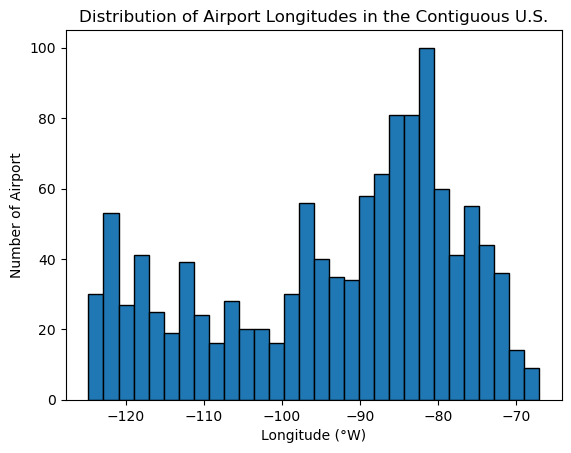

In [165]:
contiguous=DF_airport[(DF_airport['lon']>= -125) & (DF_airport['lon']<=-66)]
plt.hist(contiguous['lon'],bins=30,edgecolor='black')
plt.xlabel('Longitude (°W)')
plt.ylabel('Number of Airport')
plt.title('Distribution of Airport Longitudes in the Contiguous U.S.')
plt.show()

QUESTION 6 ANSWER: 

The histogram shows the x axis which is the longitude or it represents how far west or east each aiport is being located. Around 125° is the west coast which consists of California, Oregon and Washington while around -75° is the east coast that consists of New York, Washington DC and so on. The y axis is showing how many airports are located at each of the longitudinal ranges. This relfects the population and transportation being concentrated more on the east coast than the west coast of the United States.

SOURCE:
“List of Extreme Points of the United States.” Wikipedia, Wikimedia Foundation, 18 July 2025, en.wikipedia.org/wiki/List_of_extreme_points_of_the_United_States 

### 7. Question 7 (15 pts)
#### Recreate the plot included below using the flights data. Do the best you can to get as close as possible to what you see here. Once you have created the visualization, in no more than one paragraph, describe what you think the point of this visualization might be.

#### Hint: The visualization uses the variable arrival, which is not included in the flights data frame. You will have to create arrival yourself, it is a categorical variable that is equal to "ontime" when arr_delay <= 0 and "delayed" when arr_delay > 0. Hint: I used a lambda with an if else inside.

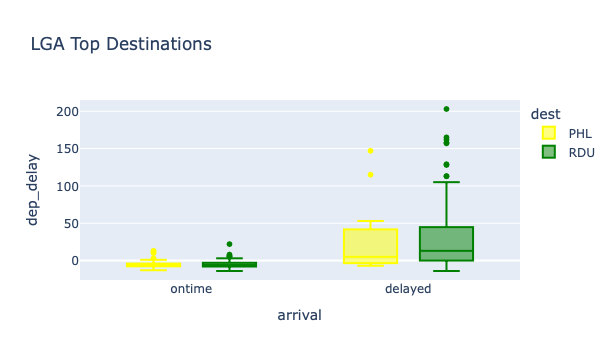

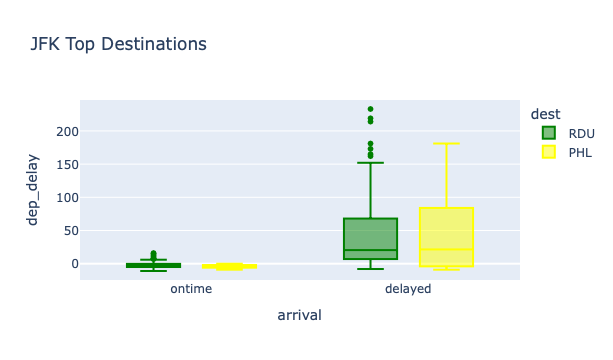

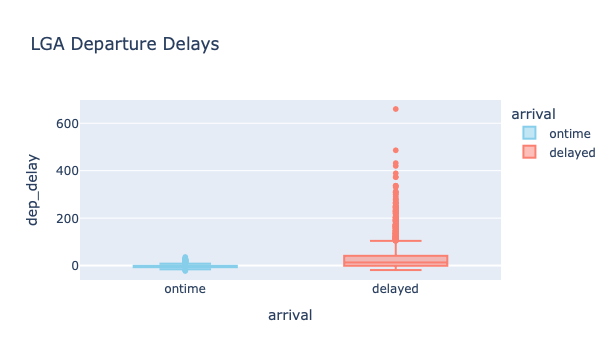

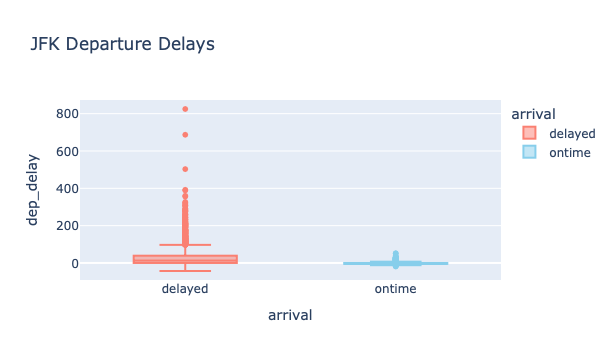

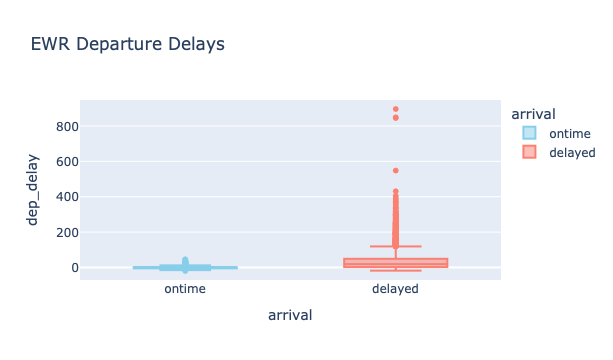

In [180]:
DF['arrival']=DF['arr_delay'].apply(lambda x: 'ontime' if x <=0 else 'delayed')

Dec_flights = DF[DF['month']==12]
                    
destination=['PHL','RDU']
dec_dest=Dec_flights[Dec_flights['dest'].isin(destination)]

fig_lga = px.box(
    dec_dest[dec_dest['origin']=='LGA'],
    x='arrival',
    y='dep_delay',
    color='dest',  
    color_discrete_map={'PHL':'yellow','RDU':'green'},
    title='LGA Top Destinations'
)
fig_lga.show()

fig_jfk = px.box(
    dec_dest[dec_dest['origin']=='JFK'],
    x='arrival',
    y='dep_delay',
    color='dest', 
    color_discrete_map={'PHL':'yellow','RDU':'green'},
    title='JFK Top Destinations'
)
fig_jfk.show()



for airport in ['LGA','JFK','EWR']:
    fig = px.box(
        Dec_flights[Dec_flights['origin']==airport],
        x='arrival',
        y='dep_delay',
        color='arrival',
        color_discrete_map={'ontime':'skyblue','delayed':'salmon'},
        title=f'{airport} Departure Delays'
    )
    fig.show()



QUESTION 7 ANSWER:

This visualization might be to highlight the on-time performance of each of the NYC flights in Decemeber while looking at different airports and their destinations. The top 2 graphs focuses on LGA and JFK flights to PHL and RDU which are showing how the arrival time differs with each route. The bottom 3 graphs show the departure delays for LGA, JFK, and EWR, where they are groupeed by whether flights arrived on time or were delayed. These graphs allow us to see the patterns pretty easy and see the punctuality in the airports and different routes.

### 8. Question 8 (15 pts)
#### Create your own data visualization that explores delayed flights. Here you are using any or all of the data sets to explore a question related to delayed flights. You are encouraged to come up with your own questions, but here are some ideas:

#### Is there an association between weather and flight delays?
#### Are large flights or small flights more likely to be late?
#### Are there certain destinations each month that are most likely to be late?
#### Can you find a pattern behind why some carriers are often delayed?


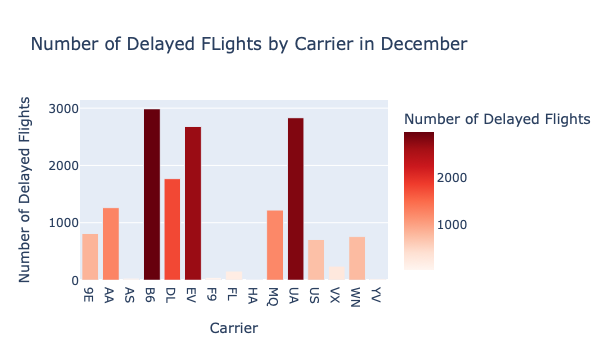

In [181]:
carrier_counts=Dec_flights.groupby('carrier')['arrival'].value_counts().reset_index(name='count')
delayed_counts=carrier_counts[carrier_counts['arrival']=='delayed']

fig=px.bar(
    delayed_counts,
    x='carrier',
    y='count',
    title='Number of Delayed FLights by Carrier in December',
    labels ={'count':'Number of Delayed Flights','carrier':'Carrier'},
    color='count',
    color_continuous_scale='Reds'
)

fig.show()

QUESTION 8 ANSWER:

1. I didn't include weather in this graph but, i could expand my analysis by joining a weather 